<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/pbarizza_loan_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Course Machine Learning
*Professor Ladle Patel*

*Student Pietro Barizza*

*Date 27.06.2025*

**Assignment:** Develop a Simple Linear Regression Model (40% of Total Grade)

**Objective:** Your task is to develop a simple linear regression model to predict an outcome based on a dataset relevant to your chosen domain. This assignment will help you apply regression techniques, data preprocessing, and model evaluation skills.

*Github*: https://github.com/pbarizza/ML-course-2025/blob/main/pbarizza_loan_amount_prediction.ipynb

In [376]:
#importing libraries
# pandas to load data, sklearn for the regression model, metrics and model selection
# label encoder to convert strings into numbers
# matplotlib for visualization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [377]:
# load the dataset from github
# alternatively the dataset can be loaded locally
loan_df = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/LoanAmountPrediction.csv')
loan_df.head()

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,A001,Male,Yes,1,Graduate,Yes,2526,8734,360,1,Rural,179.0
1,A002,Female,Yes,2,Not Graduate,No,5224,845,180,1,Semiurban,134.0
2,A003,Male,Yes,0,Not Graduate,No,17069,5777,360,1,Rural,373.0
3,A004,Male,No,0,Graduate,No,13536,3036,180,1,Urban,288.0
4,A005,Male,Yes,0,Graduate,No,15547,5947,120,1,Urban,347.0


In [378]:
# get general info about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       500 non-null    object 
 1   Gender             500 non-null    object 
 2   Married            500 non-null    object 
 3   Dependents         500 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      500 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    int64  
 8   Loan_Amount_Term   500 non-null    int64  
 9   Credit_History     500 non-null    int64  
 10  Property_Area      500 non-null    object 
 11  LoanAmount         500 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 47.0+ KB


In [379]:
# columns of the dataset
loan_df.columns


Index(['Applicant_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount'],
      dtype='object')

In [380]:
# size of the dataset
loan_df.shape

(500, 12)

In [381]:
# check for null values
loan_df.isnull().sum()

,0
Applicant_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0
Credit_History,0


In [382]:
# check for not numeric values
# columns returning False will have to be treated (encoded) first
loan_df.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())

,0
Applicant_ID,False
Gender,False
Married,False
Dependents,False
Education,False
Self_Employed,False
ApplicantIncome,True
CoapplicantIncome,True
Loan_Amount_Term,True
Credit_History,True


In [383]:
# since regression expects numbers to feed the model all columns that are strings mmust first be encoded as numbers
# transforming the 'Applicant_ID' into numberic value.
loan_df['Applicant_ID'] = loan_df['Applicant_ID'].str[1:].astype(int)
loan_df['Applicant_ID'].tail()

,Applicant_ID
495,496
496,497
497,498
498,499
499,500


In [384]:
# using label encder to transform 'Gender' into number 0=female, 1=male
loan_df['Gender'] = LabelEncoder().fit_transform(loan_df['Gender'])
loan_df['Gender'].head()


,Gender
0,1
1,0
2,1
3,1
4,1


In [385]:
# using label encder to transform 'Married' into number 0=No, 1=Yes
loan_df['Married'] = LabelEncoder().fit_transform(loan_df['Married'])
loan_df['Married'].head()


,Married
0,1
1,1
2,1
3,0
4,1


In [386]:
# transforming depends into integers. where it is 3+ making it a simple 3 by removing the '+' sign
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', '3')
loan_df['Dependents'] = pd.to_numeric(loan_df['Dependents'])
loan_df['Dependents'].head()

,Dependents
0,1
1,2
2,0
3,0
4,0


In [387]:
# using label encder to transform 'Education' into number 0=No, 1=Yes
loan_df['Education'] = LabelEncoder().fit_transform(loan_df['Education'])
loan_df['Education'].head()

,Education
0,0
1,1
2,1
3,0
4,0


In [388]:
# using label encder to transform 'Self_Employed' into number 0=No, 1=Yes
loan_df['Self_Employed'] = LabelEncoder().fit_transform(loan_df['Self_Employed'])
loan_df['Self_Employed'].head()

,Self_Employed
0,1
1,0
2,0
3,0
4,0


In [389]:
# check how many distrint values are in 'Property_Area' columns
loan_df['Property_Area'].value_counts()

,count
Property_Area,
Urban,175
Semiurban,168
Rural,157


In [390]:
# using label encder to transform 'Property_Area' into numbers
# 0=Rural, 1=Semirural, 2 = Urban
loan_df['Property_Area'] = LabelEncoder().fit_transform(loan_df['Property_Area'])
loan_df['Property_Area'].head()


,Property_Area
0,0
1,1
2,0
3,2
4,2


In [391]:
# check for not numeric values
# now all should be True
loan_df.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all())

,0
Applicant_ID,True
Gender,True
Married,True
Dependents,True
Education,True
Self_Employed,True
ApplicantIncome,True
CoapplicantIncome,True
Loan_Amount_Term,True
Credit_History,True


In [392]:
# separate independent variables (features matri X) from the dependent variable (target vector y)
X = loan_df.drop('LoanAmount', axis=1)
y = loan_df['LoanAmount']

In [393]:
# show the features
X.head()

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,1,2526,8734,360,1,0
1,2,0,1,2,1,0,5224,845,180,1,1
2,3,1,1,0,1,0,17069,5777,360,1,0
3,4,1,0,0,0,0,13536,3036,180,1,2
4,5,1,1,0,0,0,15547,5947,120,1,2


In [394]:
# show the target value
y.head()

,LoanAmount
0,179.0
1,134.0
2,373.0
3,288.0
4,347.0


In [395]:
# split the datasest into tran and test datasets
# using 80/20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [396]:
# instantiate the LinearRegression class
# and traing the model
loan_model = LinearRegression()
loan_model.fit(X_train, y_train)

LinearRegression()

In [397]:
# evaluate the mode by scoring it
# the score is very high 0.9835801461235995 indicating a good model has been generaed
loan_model.score(X_test, y_test)

0.9835801461235995

In [398]:
# feeding new data to the trained model to predict data

new_applicaant = pd.DataFrame({
    'Applicant_ID': [501],
    'Gender': [1],            # 1 for Male
    'Married': [1],           # 1 for Yes
    'Dependents': [0],        # 0 dependents
    'Education': [0],         # 0 for Not Graduate
    'Self_Employed': [0],     # 0 for No
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]  # 2 for Urban
})

loan_model.predict(new_applicaant)


array([141.60745299])

In [399]:
# show coeff and intercept of the linear regression equation
print('Coefficients:', loan_model.coef_)
print('Intercept:', loan_model.intercept_)


Coefficients: [ 2.07063701e-03 -1.61836835e-01 -6.76015348e-01  1.01415044e+00
 -3.91262291e-01 -6.73870322e-01  1.50948206e-02  1.02995036e-02
 -1.03757562e-02  4.95588466e+01  2.19864342e-01]
Intercept: -0.9284971096234926


In [400]:
# compare predicted values from the model and the original target data (y_test)
y_pred = loan_model.predict(X_test)
pd.DataFrame({'Predicted': y_pred, 'Original': y_test, 'Difference':y_test-y_pred,'Percentage':(y_test-y_pred)/y_test*100 })


,Predicted,Original,Difference,Percentage
361,156.203523,159.0,2.796477,1.758790
73,127.608145,104.0,-23.608145,-22.700140
374,256.802980,237.0,-19.802980,-8.355688
155,364.292028,350.0,-14.292028,-4.083437
104,137.038358,154.0,16.961642,11.014053
...,...,...,...,...
347,179.226201,193.0,13.773799,7.136684
86,308.828704,317.0,8.171296,2.577696
75,423.206012,426.0,2.793988,0.655866
438,286.370872,276.0,-10.370872,-3.757562


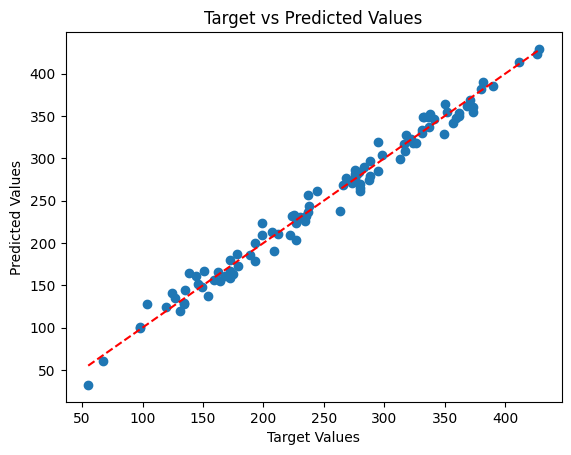

In [401]:
# scatter plot showing predicted vs target values
# in red the perfect line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Target Values')
plt.ylabel('Predicted Values')
plt.title('Target vs Predicted Values')
plt.show()

In [407]:
# Calculate R^2 score
r2=r2_score(y_test, y_pred)
print(f'R Squared score (R^2): {r2}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



R Squared score (R^2): 0.9835801461235995
Mean Absolute Error (MAE): 9.19227750479892
Root Mean Squared Error (RMSE): 11.356860507913433
Mean Absolute Percentage Error (MAPE): 0.045802006988803025
